# Unit 5 - Financial Planning

In [174]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [175]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [176]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [177]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"



In [178]:
# Fetch current BTC price
btc_curr = requests.get(btc_url).json()
btc_price = btc_curr["data"]["1"]["quotes"]["USD"]["price"]


# Fetch current ETH price
eth_curr = requests.get(eth_url).json()
eth_price = eth_curr["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $48624.00
The current value of your 5.3 ETH is $16265.49


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [179]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [180]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [181]:
# Format current date as ISO format
today = pd.Timestamp("2022-04-12",tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
seperated_df = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])


# Preview DataFrame
seperated_df

SPY                                      \
                             open    high       low   close    volume   
timestamp                                                               
2022-04-12 04:00:00+00:00  443.02  445.75  436.6501  438.29  84020734   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-12 04:00:00+00:00      694115  440.815476  104.83  104.92  104.58   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-04-12 04:00:00+00:00  104.61  8448652       29955  104.740856

In [182]:
# Pick AGG and SPY close prices
agg_close_price = float(seperated_df["AGG"]["close"])
spy_close_price = float(seperated_df["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $104.61
Current SPY closing price: $438.29


In [183]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21914.50
The current value of your 200 AGG shares is $20922.00


### Savings Health Analysis

In [184]:
# Set monthly household income
monthly_income = 12000


# Consolidate financial assets data
cryto = my_eth_value + my_btc_value
shares = my_agg_value + my_spy_value

savings_series = {'Fund': ["Crypto", "Shares"], 'Amount': [cryto, shares]}

# Create savings DataFrame
df_savings = pd.DataFrame(data=savings_series).set_index("Fund")

# Display savings DataFrame
df_savings

,Amount
Fund,
Crypto,64889.488
Shares,42836.500


<AxesSubplot:ylabel='Amount'>

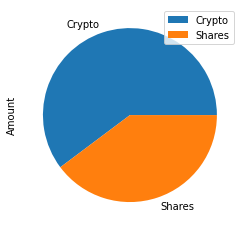

In [185]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount")

In [186]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = cryto + shares

# Validate saving health
if savings > emergency_fund:
    print("Congratulations, your emergency fund is funded!!!")
elif savings is emergency_fund:
    print("Congratualtions, you reached your goal!!")
elif savings < emergency_fund:
    print("You are  only $", (emergency_fund-savings), " away from your goal!")

Congratulations, your emergency fund is funded!!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [187]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-04-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-15', tz='America/New_York').isoformat()

In [188]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY_2 = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG_2 = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY_2, AGG_2],axis=1, keys=['SPY','AGG'])

# Display sample data
df_stock_data.head()

SPY                                      \
                             open     high     low   close     volume   
timestamp                                                               
2017-04-17 04:00:00+00:00  233.12  234.570  232.88  234.57   68405367   
2017-04-18 04:00:00+00:00  233.71  234.490  233.08  233.87   83225836   
2017-04-19 04:00:00+00:00  234.52  234.950  233.18  233.44   68699868   
2017-04-20 04:00:00+00:00  234.14  235.845  233.78  235.34   92572186   
2017-04-21 04:00:00+00:00  235.22  235.310  234.13  234.59  110389847   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2017-04-17 04:00:00+00:00      213643  233.870859  109.30  109.4000  109.18   
2017-04-18 04:00:00+00:00      245279  233.958942  109.41  109.7000  109.39   
2017-04-19 04:00:00+00:00      248643  233.953779  109.47  109.5600  109.39   
2017-04-20 04:00:00+00:00      279885  234.978432  109.31  109.4000  109.20   
2017-04-21 04:00:00+00:00      258915  234.784238  109.40  109.4899  109.30   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-04-17 04:00:00+00:00  109.21  1646056        7973  109.294030  
2017-04-18 04:00:00+00:00  109.65  2369862       14488  109.579396  
2017-04-19 04:00:00+00:00  109.48  2148531        9587  109.455386  
2017-04-20 04:00:00+00:00  109.31  1867805        7319  109.301387  
2017-04-21 04:00:00+00:00  109.34  1539265        8708  109.386803

In [189]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_THIRTYyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [190]:
# Printing the simulation input data
MC_THIRTYyear.portfolio_data.head()

SPY                                      \
                             open     high     low   close     volume   
timestamp                                                               
2017-04-17 04:00:00+00:00  233.12  234.570  232.88  234.57   68405367   
2017-04-18 04:00:00+00:00  233.71  234.490  233.08  233.87   83225836   
2017-04-19 04:00:00+00:00  234.52  234.950  233.18  233.44   68699868   
2017-04-20 04:00:00+00:00  234.14  235.845  233.78  235.34   92572186   
2017-04-21 04:00:00+00:00  235.22  235.310  234.13  234.59  110389847   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-04-17 04:00:00+00:00      213643  233.870859          NaN  109.30   
2017-04-18 04:00:00+00:00      245279  233.958942    -0.002984  109.41   
2017-04-19 04:00:00+00:00      248643  233.953779    -0.001839  109.47   
2017-04-20 04:00:00+00:00      279885  234.978432     0.008139  109.31   
2017-04-21 04:00:00+00:00      258915  234.784238    -0.003187  109.40   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2017-04-17 04:00:00+00:00  109.4000  109.18  109.21  1646056        7973   
2017-04-18 04:00:00+00:00  109.7000  109.39  109.65  2369862       14488   
2017-04-19 04:00:00+00:00  109.5600  109.39  109.48  2148531        9587   
2017-04-20 04:00:00+00:00  109.4000  109.20  109.31  1867805        7319   
2017-04-21 04:00:00+00:00  109.4899  109.30  109.34  1539265        8708   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-04-17 04:00:00+00:00  109.294030          NaN  
2017-04-18 04:00:00+00:00  109.579396     0.004029  
2017-04-19 04:00:00+00:00  109.455386    -0.001550  
2017-04-20 04:00:00+00:00  109.301387    -0.001553  
2017-04-21 04:00:00+00:00  109.386803     0.000274

In [191]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_THIRTYyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Notebook3\Rutgers\BootCamp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997712,1.003705,1.016920,1.010344,0.997641,1.004977,0.995457,1.015335,1.012637,0.999277,...,0.982846,0.998047,1.007592,0.986324,0.993796,0.996252,1.005346,0.998780,0.997422,1.004650
2,1.009764,0.994622,1.021925,1.000681,0.991249,0.992209,1.001029,1.031440,0.999546,0.996854,...,0.981787,1.000289,1.006742,1.001701,1.003954,1.000643,0.999295,0.992801,0.993277,0.994758
3,1.004753,0.998268,1.027248,1.004355,1.003753,0.992739,0.996478,1.025221,0.989945,0.996182,...,0.980494,1.001499,1.012131,1.000844,1.007632,0.995419,1.000092,1.003669,1.005544,1.002905
4,0.989314,1.012687,1.017278,0.993500,0.998862,0.995552,0.991917,1.028418,0.996295,1.001150,...,0.983851,0.999964,1.015471,1.005967,1.016629,0.996567,0.999017,1.013513,1.003533,1.000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.451568,7.827774,77.840987,6.073826,5.426805,12.257272,5.095067,9.699524,17.811019,19.365432,...,6.534542,11.253079,6.138174,12.519638,15.714696,8.381581,19.410917,16.196274,5.089264,9.403770
7557,17.464690,7.915184,78.190089,6.110644,5.416771,12.116517,4.985077,9.830697,18.032429,19.570259,...,6.563557,11.305067,6.170436,12.526659,15.665131,8.190352,19.229113,16.138315,5.077140,9.468104
7558,17.439698,7.920512,77.888999,6.071947,5.421569,12.098754,5.003703,9.916948,18.043752,19.669207,...,6.573829,11.254417,6.128090,12.564782,15.729515,8.150371,19.372702,16.288764,5.079841,9.425183
7559,17.231916,7.961208,78.099098,6.087154,5.393568,12.015875,5.001025,9.917445,17.994164,19.789541,...,6.633429,11.239558,6.088176,12.568212,15.606145,8.162855,19.196750,16.178034,5.082096,9.397304


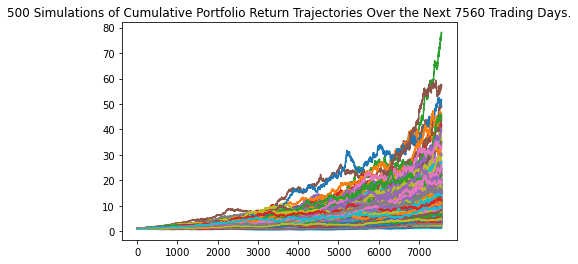

In [192]:
# Plot simulation outcomes
line_plot = MC_THIRTYyear.plot_simulation()

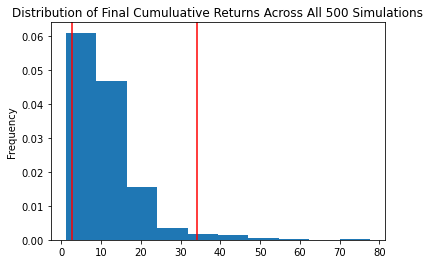

In [193]:
# Plot probability distribution and confidence intervals
dist_plot = MC_THIRTYyear.plot_distribution()

### Retirement Analysis

In [194]:
# Fetch summary statistics from the Monte Carlo simulation results
fethcer = MC_THIRTYyear.summarize_cumulative_return()

# Print summary statistics
fethcer

count           500.000000
mean             11.312950
std               8.406571
min               1.127831
25%               5.926299
50%               9.221574
75%              14.532376
max              77.675351
95% CI Lower      2.792574
95% CI Upper     34.233737
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [195]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(fethcer[8]*initial_investment,2)
ci_upper = round(fethcer[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $55851.49 and $684674.74


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [196]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(fethcer[8]*initial_investment,2)
ci_upper = round(fethcer[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $83777.23 and $1027012.11


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [197]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_FIVEyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [198]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_FIVEyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Notebook3\Rutgers\BootCamp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995355,1.003216,0.993776,0.993429,1.003252,0.996707,1.012794,0.993128,0.999010,0.989712,...,1.000908,1.012329,0.992369,1.007456,0.991513,0.997352,1.003343,1.005348,1.003432,1.000568
2,0.996893,1.003986,0.999713,0.990157,0.993896,0.989235,1.018763,0.983139,0.978397,0.987530,...,1.005796,1.012295,1.001332,1.006280,0.984367,0.983695,1.005615,1.008293,1.016090,1.001272
3,1.005127,1.002092,1.011897,0.995855,0.993973,0.996661,1.015594,0.973365,0.980723,0.991819,...,1.001067,1.010989,1.002228,1.006140,0.987771,0.991568,1.005853,1.018372,1.012189,0.998616
4,1.001710,1.001481,1.020786,0.999457,0.997597,0.996798,1.015569,0.965472,0.991398,0.998545,...,1.016105,1.033272,1.000133,1.003964,0.997267,0.994214,1.008713,1.025423,1.009952,0.997288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.478491,1.349908,1.220037,2.115547,0.994536,1.068552,1.313069,1.458736,1.408247,1.560653,...,1.213916,1.854096,1.166106,1.025287,1.376194,2.306959,1.777299,1.337898,1.701636,1.572086
1257,1.467427,1.341800,1.226928,2.106317,1.003280,1.071018,1.317472,1.470664,1.408207,1.544578,...,1.202192,1.884725,1.162555,1.025525,1.365966,2.318358,1.787063,1.361434,1.714206,1.581594
1258,1.477463,1.342598,1.228024,2.133160,1.006115,1.074510,1.316056,1.474490,1.400003,1.531060,...,1.214599,1.892690,1.174427,1.013152,1.374945,2.327144,1.785994,1.366088,1.723202,1.578081
1259,1.495469,1.340217,1.230451,2.149747,1.006153,1.072977,1.324958,1.479028,1.410592,1.523308,...,1.212005,1.881839,1.183195,1.015740,1.385038,2.313190,1.777886,1.346107,1.736760,1.583920


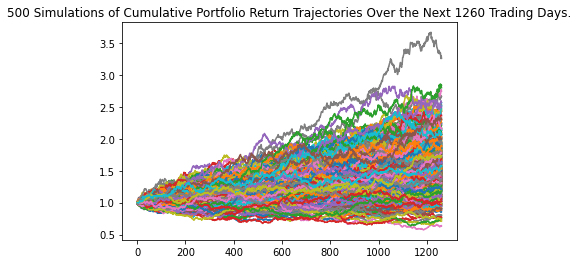

In [199]:
# Plot simulation outcomes
plot_line = MC_FIVEyear.plot_simulation()

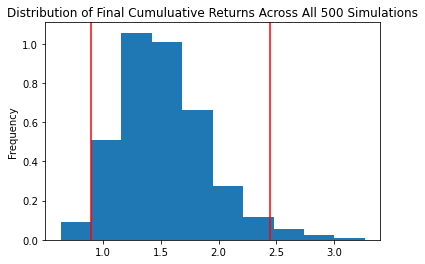

In [200]:
# Plot probability distribution and confidence intervals
five_year_dist_plot = MC_FIVEyear.plot_distribution()

In [201]:
# Fetch summary statistics from the Monte Carlo simulation results
new_fethcer = MC_FIVEyear.summarize_cumulative_return()

# Print summary statistics
new_fethcer

count           500.000000
mean              1.523956
std               0.387692
min               0.635725
25%               1.256882
50%               1.482061
75%               1.759728
max               3.264067
95% CI Lower      0.902242
95% CI Upper      2.448704
Name: 1260, dtype: float64

In [202]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(new_fethcer[8]*initial_investment,2)
ci_upper_five = round(new_fethcer[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18044.85 and $48974.09


### Ten Years Retirement Option

In [203]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_TENyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [204]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_TENyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.


KeyboardInterrupt: 

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

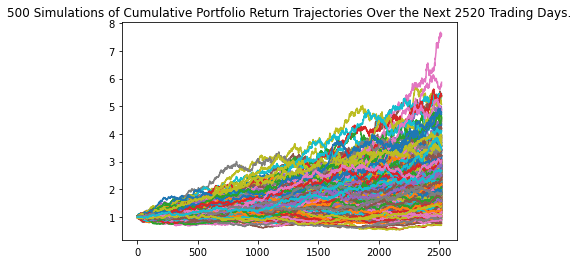

In [ ]:
# Plot simulation outcomes
MC_TENyear.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

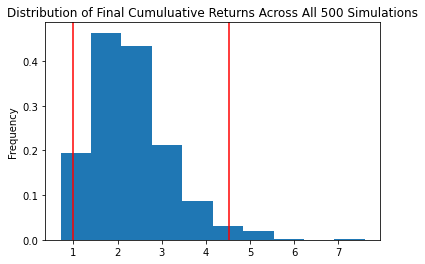

In [ ]:
# Plot probability distribution and confidence intervals
MC_TENyear.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_fetch = MC_TENyear.summarize_cumulative_return()

# Print summary statistics
ten_year_fetch

count           500.000000
mean              2.297862
std               0.914787
min               0.706771
25%               1.634937
50%               2.158099
75%               2.755129
max               7.606820
95% CI Lower      0.997613
95% CI Upper      4.529697
Name: 2520, dtype: float64

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_year_fetch[8]*initial_investment,2)
ci_upper_ten = round(ten_year_fetch[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $19952.27 and $90593.94
